## Hotel Booking Prediction

Project developed for academic purposes by Master's students of NOVA SBE in Business Analytics:

- Guilherme Raimundo - 58053;
- Francisco Gomes - 39350;
- Martim Costa - 39358;
- Luís Oliveira - 43123;
- Marta Dinis - 43027;



# Problem overview


## Background Story  

In the hotel industry, two places are diving deep into what makes guests tick. One's a laid-back resort called Seaside Escape (H1), and the other's a lively city spot named Urban Retreat (H2). They both decided to keep track of a bunch of stuff about their bookings - we're talking over 119,390 bits of info from July 1, 2015, to August 31, 2017. This includes all the bookings, even the ones that got canceled.

Usually, hotels keep their cards close to their chest, especially about their guests and how they book their stays. But Seaside Escape and Urban Retreat are shaking things up. They've cleaned up the data so there's nothing private in there and are sharing it with the world. Why? Because it's super hard to find real-deal business data that students and researchers can learn from, especially in the hotel biz.

With this goldmine of data, curious people can really dig into what makes guests choose a hotel, why they might cancel, and how to make their stay better. It's a big deal for anyone wanting to get smarter about how hotels work and how to make guests happy. So, in a nutshell, these two hotels are not just about giving their guests a sweet stay; they're also helping to teach the world a thing or two about the hotel game.

## The Challenge

Seaside Escape and Urban Retreat's rich booking datasets illuminate guest booking behaviors and cancellation patterns over two years but fall short in offering predictive insights for individual guest decisions. Traditional approaches to guest management and engagement have been effective to a degree, but the management teams at both hotels believe that a leap forward is possible through a more analytical strategy.

We are a member of the guest experience innovation team! Our mission is to craft a predictive model that leverages the extensive data from both hotels to forecast whether guests will follow through with their bookings or cancel. This model seeks to revolutionize how Seaside Escape and Urban Retreat interact with potential and existing guests by enabling proactive adjustments to services, personalized guest communication, and targeted promotional offers.

This predictive endeavor aims to enhance guest satisfaction and retention, ensuring both hotels not only meet but exceed the evolving expectations of their guests, thereby setting new standards in the hospitality industry for customer care and engagement.

## Data Description

This idea for a predictive model is based on an article that contains two dataframes with the main information to tackle the problem:

##### Variables
- **ADR** (Average Daily Rate): Numeric. Defined as the sum of all lodging transactions divided by the total number of staying nights. Source/Engineering: BO, BL, and TR.
- **Adults**: Integer. Number of adults. Source: BO and BL.
- **Agent**: Categorical. ID of the travel agency that made the booking. Source: BO and BL.
- **ArrivalDateDayOfMonth**: Integer. Day of the month of the arrival date. Source: BO and BL.
- **ArrivalDateMonth**: Categorical. Month of arrival date, categorized from “January” to “December”. Source: BO and BL.
- **ArrivalDateWeekNumber**: Integer. Week number of the arrival date. Source: BO and BL.
- **ArrivalDateYear**: Integer. Year of arrival date. Source: BO and BL.
- **AssignedRoomType**: Categorical. Code for the type of room assigned to the booking, which may differ from the reserved room type for various reasons. Source: BO and BL.
- **Babies**: Integer. Number of babies. Source: BO and BL.
- **BookingChanges**: Integer. Number of changes made to the booking before check-in or cancellation. Source/Engineering: BO and BL.
- **Children**: Integer. Number of children, including both payable and non-payable. Source/Engineering: BO and BL.
- **Company**: Categorical. ID of the company/entity responsible for the booking or payment. Source: BO and BL.
- **Country**: Categorical. Country of origin in ISO 3155–3:2013 format. Source: BO, BL, and NT.
- **CustomerType**: Categorical. Assumes one of four categories: Contract, Group, Transient, Transient-party, based on the nature of the booking. Source: BO and BL.
- **DaysInWaitingList**: Integer. Days the booking was on the waiting list before confirmation. Source/Engineering: BO.
- **DepositType**: Categorical. Indicates if a deposit was made, with categories: No Deposit, Non Refund, Refundable. Source/Engineering: BO and TR.
- **DistributionChannel**: Categorical. Booking distribution channel, with “TA” for Travel Agents and “TO” for Tour Operators. Source: BO, BL, and DC.
- **IsCanceled**: Categorical. Indicates if the booking was canceled (1) or not (0). Source: BO.
- **IsRepeatedGuest**: Categorical. Indicates if the booking was from a repeated guest (1) or not (0). Source: BO, BL, and C.
- **LeadTime**: Integer. Days between the booking date and the arrival date. Source/Engineering: BO and BL.
- **MarketSegment**: Categorical. Designation of market segment, with “TA” for Travel Agents and “TO” for Tour Operators. Source: BO, BL, and MS.
- **Meal**: Categorical. Type of meal booked, with categories: Undefined/SC, BB (Bed & Breakfast), HB (Half board), FB (Full board). Source: BO, BL, and ML.
- **PreviousBookingsNotCanceled**: Integer. Number of previous bookings not canceled by the customer. Source/Engineering: BO and BL.
- **PreviousCancellations**: Integer. Number of previous bookings canceled by the customer. Source/Engineering: BO and BL.
- **RequiredCardParkingSpaces**: Integer. Number of car parking spaces required. Source: BO and BL.
- **ReservationStatus**: Categorical. Last status of the reservation: Canceled, Check-Out, No-Show. Source: BO.
- **ReservationStatusDate**: Date. Date when the last status was set. Source: BO.
- **ReservedRoomType**: Categorical. Code for the type of room reserved. Source: BO and BL.
- **StaysInWeekendNights**: Integer. Number of weekend nights stayed. Source/Engineering: BO and BL.
- **StaysInWeekNights**: Integer. Number of week nights stayed. Source/Engineering: BO and BL.
- **TotalOfSpecialRequests**: Integer. Number of special requests made by the customer. Source/Engineering: BO and BL.

## PHASE 1 - EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# let's import the datasets and read them as pandas dataframes

h1_df = pd.read_csv('H1.csv')
h2_df = pd.read_csv('H2.csv')

In [ ]:
# Add a column to each dataframe to indicate the hotel

h1_df['hotel'] = 'H1'
h2_df['hotel'] = 'H2'

In [ ]:
# datasets h1_df and h2_df have the same columns, so we can just add them together to create a bigger dataset (keeping the exact same values)

df = pd.concat([h1_df, h2_df])

In [ ]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1


In [ ]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include='object')

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus,ReservationStatusDate,hotel
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,12,5,177,8,5,10,12,3,334,353,4,3,926,2
top,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Check-Out,2015-10-21,H2
freq,13877,92310,48590,56477,97870,85994,74053,104641,31961,112593,89613,75166,1461,79330


In [ ]:
# let's check for missing values

#first let's convert NULL values to NaN, to get uniform format for missing values

df = df.applymap(lambda x: np.nan if str(x).strip().upper() == 'NULL' else x)

df.isnull().sum()

C:\Users\guira\AppData\Local\Temp\ipykernel_22096\3130127001.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if str(x).strip().upper() == 'NULL' else x)


IsCanceled                          0
LeadTime                            0
ArrivalDateYear                     0
ArrivalDateMonth                    0
ArrivalDateWeekNumber               0
ArrivalDateDayOfMonth               0
StaysInWeekendNights                0
StaysInWeekNights                   0
Adults                              0
Children                            4
Babies                              0
Meal                                0
Country                           488
MarketSegment                       0
DistributionChannel                 0
IsRepeatedGuest                     0
PreviousCancellations               0
PreviousBookingsNotCanceled         0
ReservedRoomType                    0
AssignedRoomType                    0
BookingChanges                      0
DepositType                         0
Agent                           16340
Company                        112593
DaysInWaitingList                   0
CustomerType                        0
ADR         

In [ ]:
df['hotel'].value_counts()

hotel
H2    79330
H1    40060
Name: count, dtype: int64

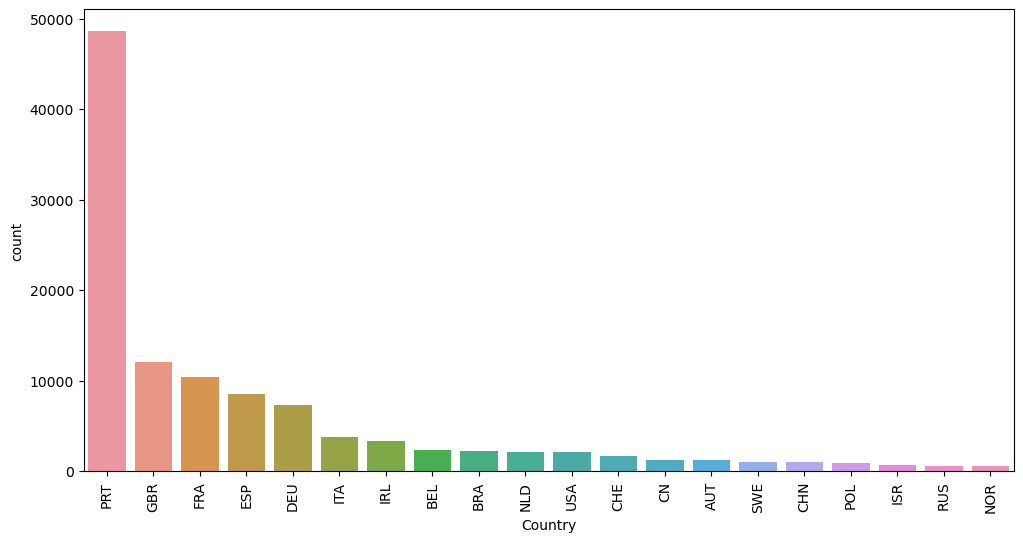

In [ ]:
# let's plot the distribution of number of reservations by country, top 20

# Resetting the index of the concatenated DataFrame
df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

**Portugal is by far the country of origin of the majority of guests. Perhaps what explains this is the fact that these hotels are located in Portugal.**

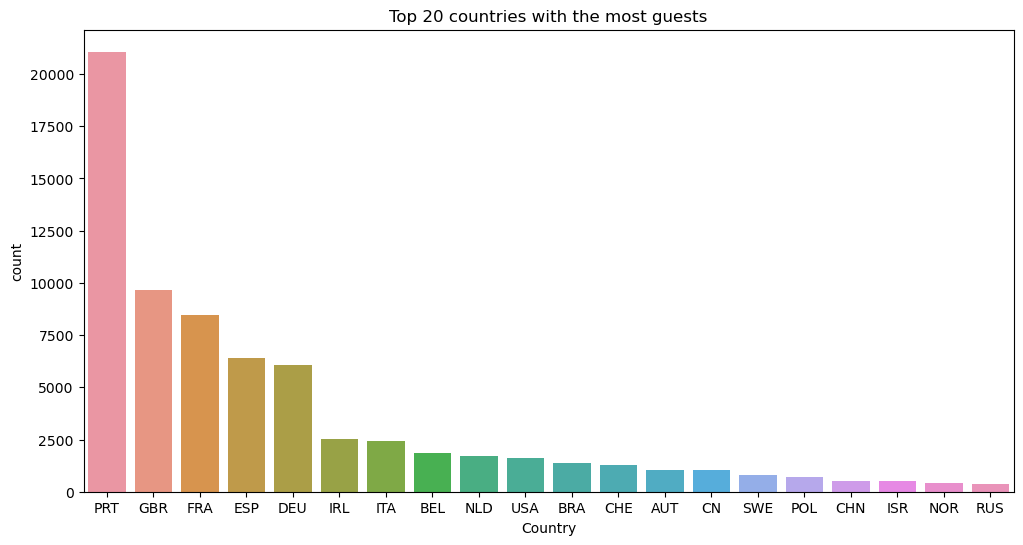

In [ ]:
# Let's see the distribution of guests (people that didn't cancel) by country

#let's see the top 20

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['IsCanceled'] == 0], x='Country', order=df[df['IsCanceled'] == 0]['Country'].value_counts().head(20).index)
plt.title('Top 20 countries with the most guests')
plt.show()

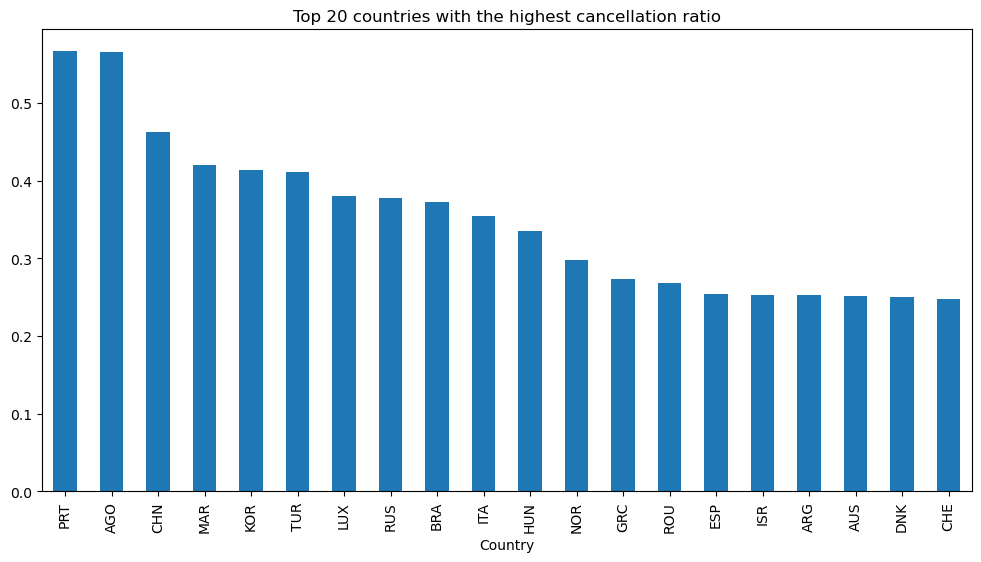

In [ ]:
# Let's now see the distribution of ratios between number of cancelLations and number of stays by country

# let's calculate the ratio

country_reservations = df['Country'].value_counts()
country_cancellations = df[df['IsCanceled'] == 1]['Country'].value_counts()

country_ratio =  country_cancellations/country_reservations

# plot top 20, using just countries with at least 100 reservations

plt.figure(figsize=(12, 6))
country_ratio[country_reservations > 100].sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 countries with the highest cancellation ratio')
plt.show()

In [ ]:
# calculate the number of total reservations and cancellations for each country

country_data = pd.DataFrame({'reservations': country_reservations, 'cancellations': country_cancellations})
country_data['ratio'] = country_data['cancellations']/country_data['reservations']

country_data.sort_values(by=['reservations', 'ratio'], ascending=False).head(20)

,reservations,cancellations,ratio
Country,,,
PRT,48590,27519.0,0.566351
GBR,12129,2453.0,0.202243
FRA,10415,1934.0,0.185694
ESP,8568,2177.0,0.254085
DEU,7287,1218.0,0.167147
ITA,3766,1333.0,0.353956
IRL,3375,832.0,0.246519
BEL,2342,474.0,0.202391
BRA,2224,830.0,0.373201


C:\Users\guira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


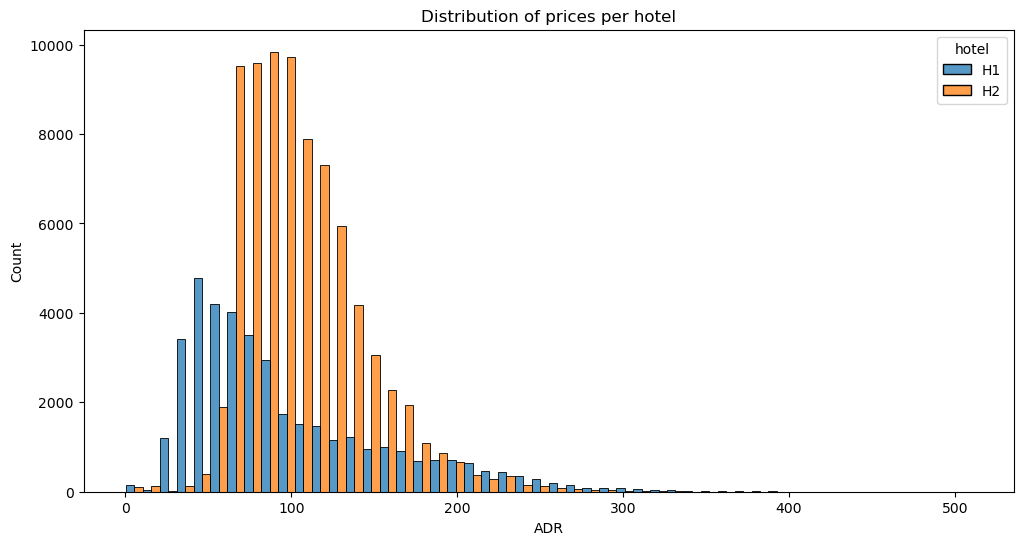

In [ ]:
# let's see the distribution of the prices per hotel (excluding outliers)

plt.figure(figsize=(12, 6))
sns.histplot(data=df[(df['ADR'] < 1000) & (df['ADR'] > 0)], x='ADR', hue='hotel', bins=50, multiple='dodge')
plt.title('Distribution of prices per hotel')
plt.show()

C:\Users\guira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


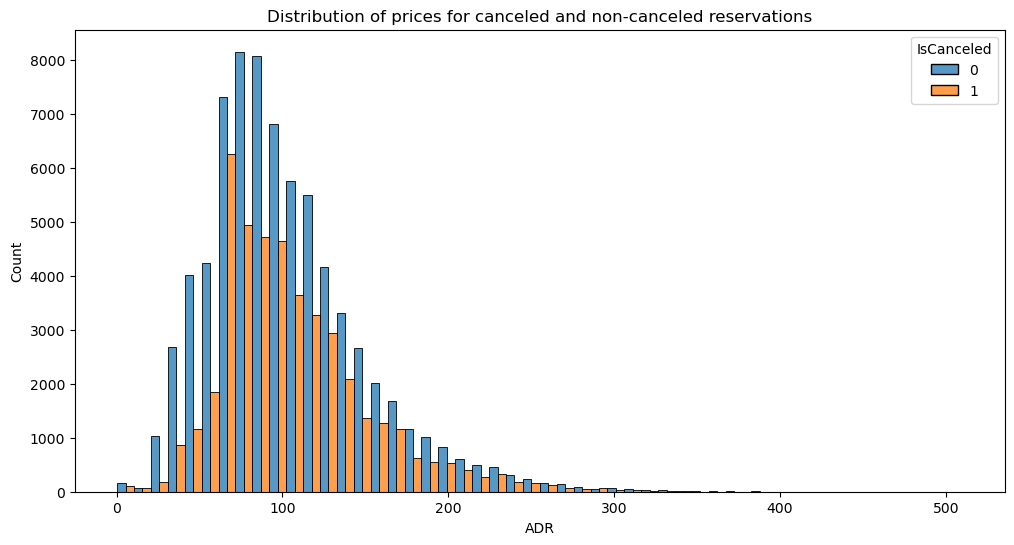

In [ ]:
# let's see the distribution of the prices for canceled and non-cancelled reservations (excluding outliers)

plt.figure(figsize=(12, 6))
sns.histplot(data=df[(df['ADR'] < 1000) & (df['ADR'] > 0)], x='ADR', hue='IsCanceled', bins=50, multiple='dodge')
plt.title('Distribution of prices for canceled and non-canceled reservations')
plt.show()

In [ ]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

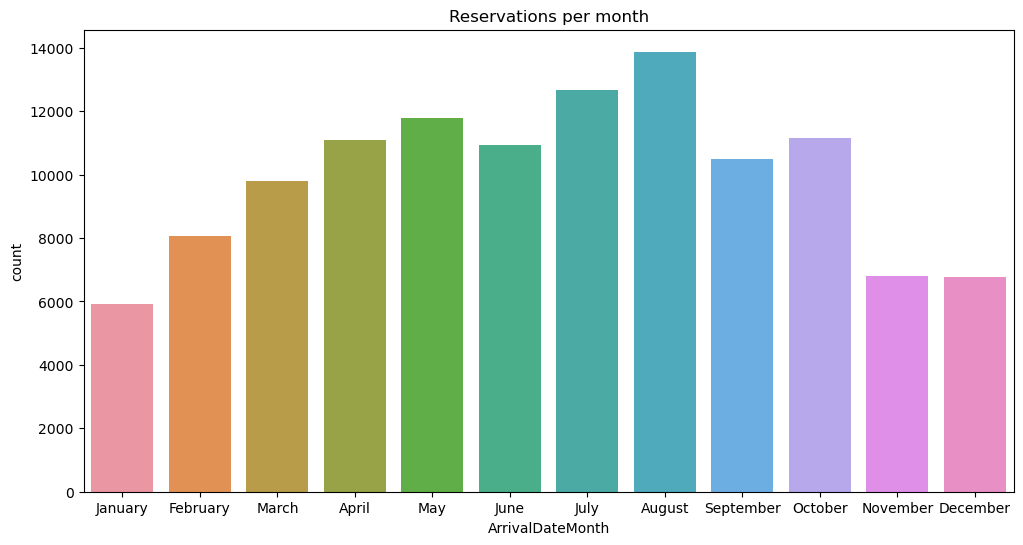

In [ ]:
# let's see the distribution of the Arrival Month for canceled and non-cancelled reservations per hotel

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ArrivalDateMonth', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Reservations per month')
plt.show()

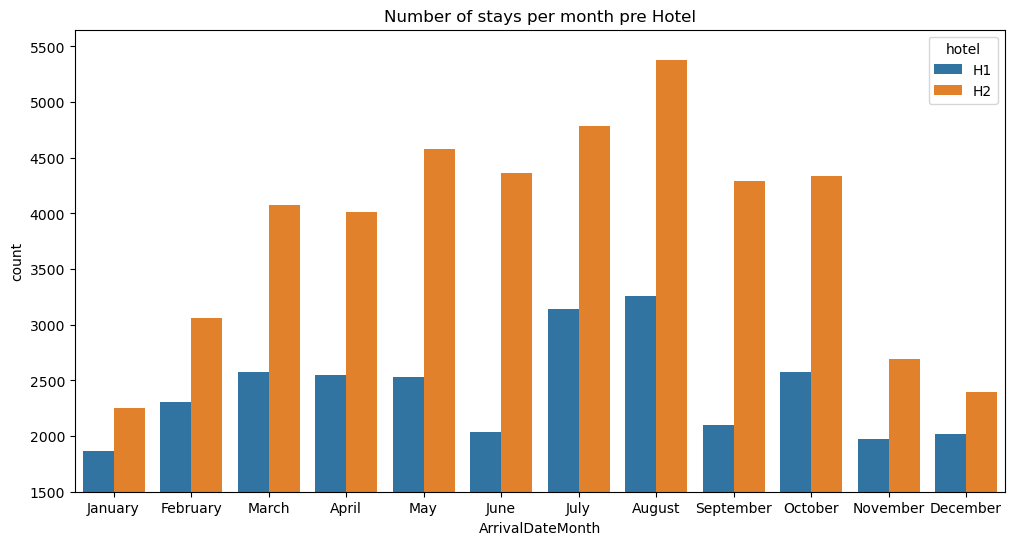

In [ ]:
# let's see the distribution of stays (non-cancelled reservations) per hotel over the months

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['IsCanceled'] == 0], x='ArrivalDateMonth', hue='hotel', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of stays per month pre Hotel')
plt.ylim(1500, None) # to better see the differences
plt.show()

**The City Hotel (H2) experiences a surge in guest numbers in the months of the Summer, mainly July and August. The Resort Hotel (H1), also witnesses an increase in guest count in July and August, a period that also aligns with its highest rates. The winter season tends to be the least busy for both establishments.**

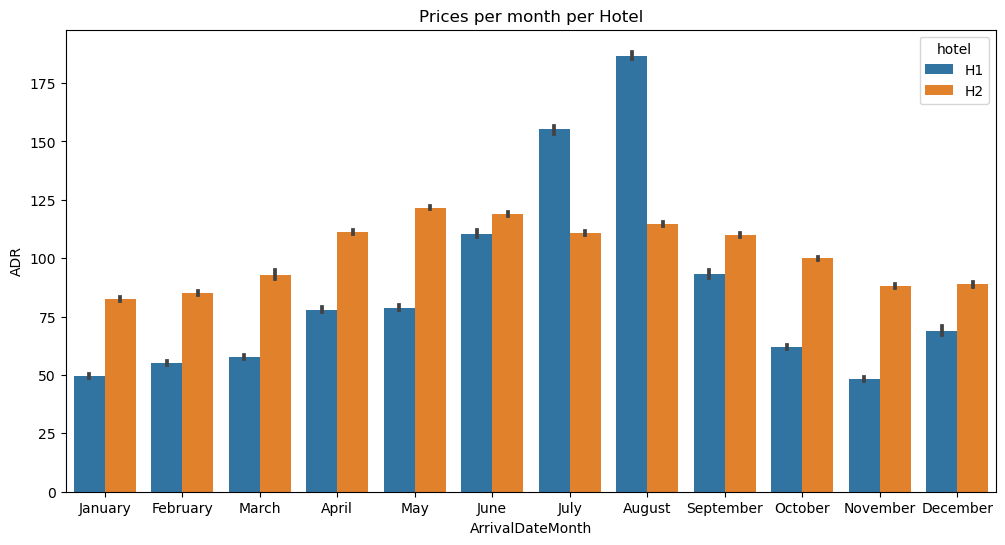

In [ ]:
# distribution of prices, per hotel, per month

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='ArrivalDateMonth', y='ADR', hue='hotel', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Prices per month per Hotel')
plt.show()

Note: The sns.barplot() function in seaborn, by default, estimates the mean (average) of the y variable for each category of the x variable.
In this case, it’s computing the average ‘ADR’ (Average Daily Rate) for each month (‘ArrivalDateMonth’) separately for each hotel.
So, the height of each bar represents the average rate for that hotel for that month.

**The graph distinctly illustrates that the rates at the Resort Hotel (H1) significantly escalate during the summer season. On the other hand, the City Hotel’s (H2) prices exhibit less fluctuation.**

C:\Users\guira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


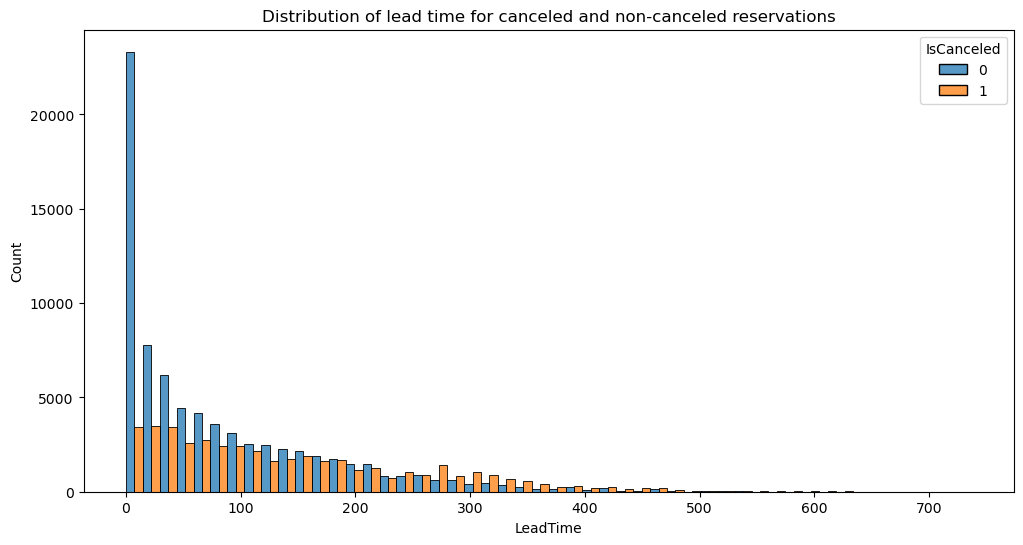

In [ ]:
# let's see the distribution of the lead time for canceled and non-canceled reservations per hotel

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='LeadTime', hue='IsCanceled', bins=50, multiple='dodge')
plt.title('Distribution of lead time for canceled and non-canceled reservations')
plt.show()

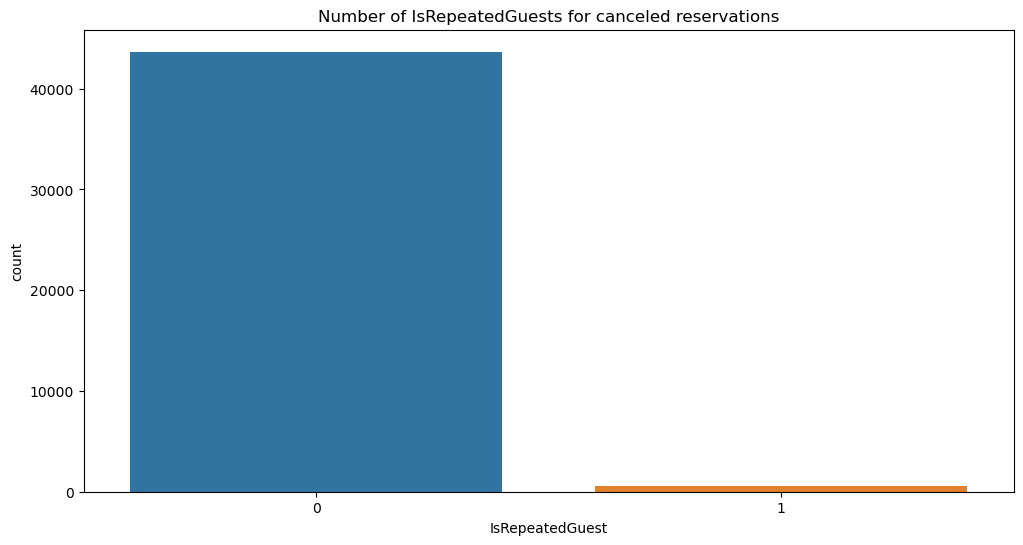

In [ ]:
# let's plot the number of IsRepeatedGuests if the reservation was canceled
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['IsCanceled'] == 1], x='IsRepeatedGuest')
plt.title('Number of IsRepeatedGuests for canceled reservations')
plt.show()

It's no surprise that the number of repeated guests is very low for canceled reservations, as these guests are more likely to know what to expect from the hotel.

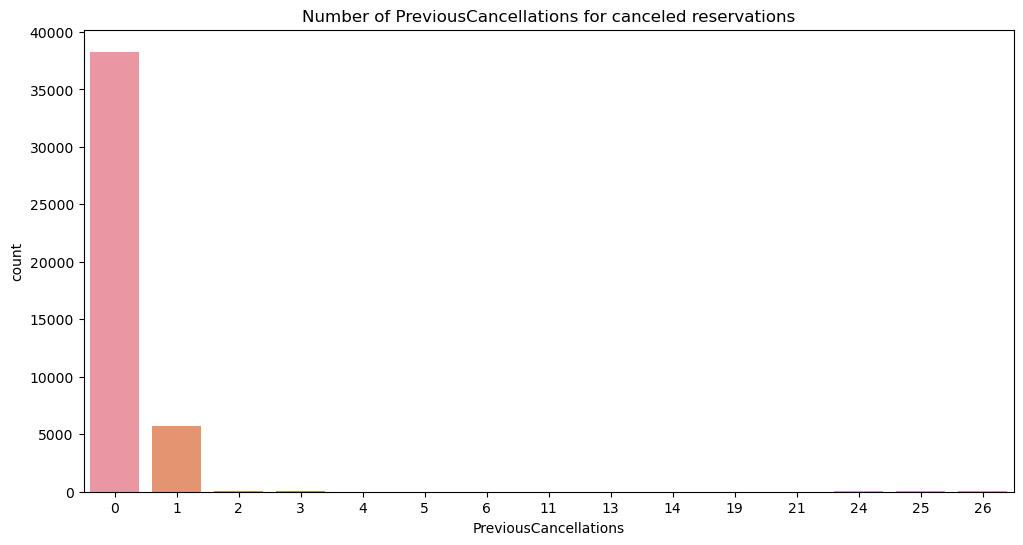

In [ ]:
# let's plot the number of PreviousBooks Canceled if the reservation was canceled

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['IsCanceled'] == 1], x='PreviousCancellations')
plt.title('Number of PreviousCancellations for canceled reservations')
plt.show()

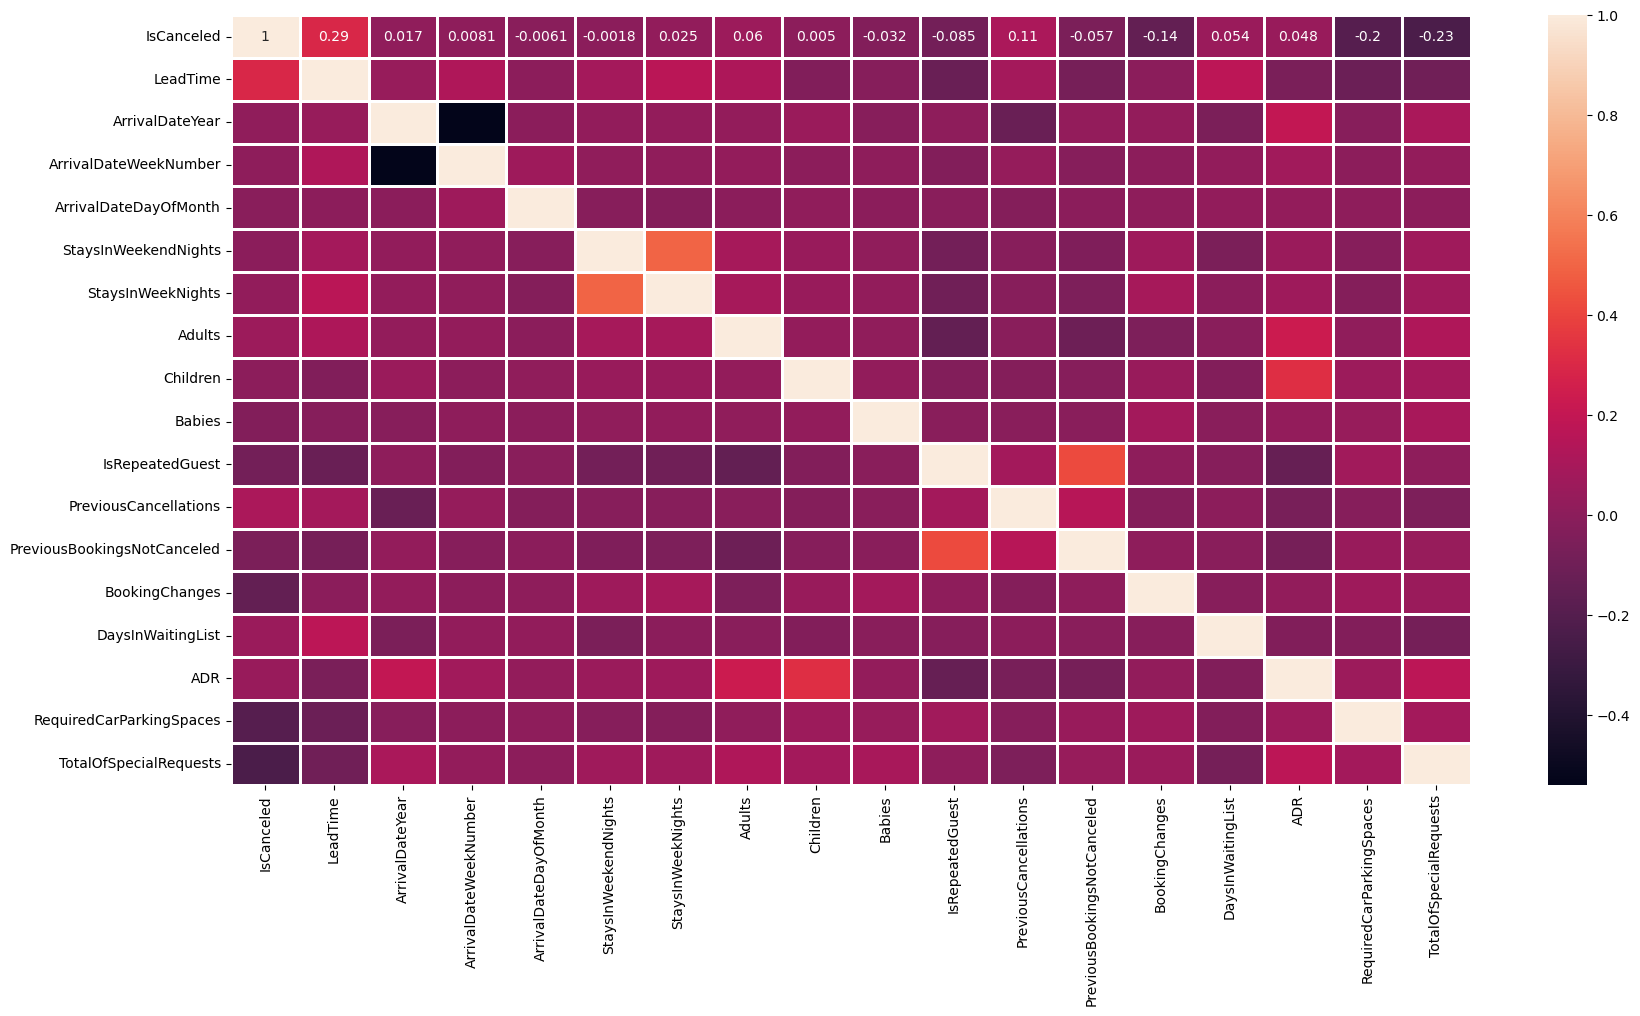

In [ ]:
plt.figure(figsize = (20, 10))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
# let's see the correlation of variables with IsCanceled

corr['IsCanceled'].sort_values(ascending=False)

IsCanceled                     1.000000
LeadTime                       0.293123
PreviousCancellations          0.110133
Adults                         0.060017
DaysInWaitingList              0.054186
ADR                            0.047557
StaysInWeekNights              0.024765
ArrivalDateYear                0.016660
ArrivalDateWeekNumber          0.008148
Children                       0.005048
StaysInWeekendNights          -0.001791
ArrivalDateDayOfMonth         -0.006130
Babies                        -0.032491
PreviousBookingsNotCanceled   -0.057358
IsRepeatedGuest               -0.084793
BookingChanges                -0.144381
RequiredCarParkingSpaces      -0.195498
TotalOfSpecialRequests        -0.234658
Name: IsCanceled, dtype: float64

In [ ]:
number_of_cancellations = df['IsCanceled'].sum()
print(f'Number of cancellations: {number_of_cancellations}')

Number of cancellations: 44220


In [ ]:
number_of_reservations = df[df['IsCanceled'] == 0].shape[0]
print(f'Number of reservations: {number_of_reservations}')

Number of reservations: 75166


## PHASE 2 - DATA PREPROCESSING

In [ ]:
# Drop rows where the value in the "Children" column is null
df.dropna(subset=['Children'], inplace=True)

In [ ]:
# Dropping columns that are not useful for the predictions
useless_col = ['DaysInWaitingList', 'ArrivalDateYear', 'AssignedRoomType', 'BookingChanges',
               'ReservationStatus', 'Country']

df.drop(useless_col, axis=1, inplace=True)

On one hand, regarding analysis, all (or almost all) features could be included in the modelling phase, since it's easy to understand their importance/influence to the causing of churn.
However, here our goal is to test a model, based in relatively simple algorithms of classification. And including too many features can cause more harm than good. For that reason, there are some columns we decided to drop before modeling.

- Since ReservationStatus shows the last status of the reservation, and we already have the IsCanceled column, this column becomes redundant and can be dropped.

- ArrivalDateYear is also redundant, since we have other columns that offer us more concrete information about time, and the year of arriving (when considering the years in analysis), doesn't offer per se, a particular interest in relation with churn.

- As seen during EDA, the values from country column are very unbalanced, which could cause problems.  And, although, in a certain degree, the country of origin could influence the rate of cancelation from users., we decided to also drop this column to simplify.

- Regarding the variables DaysInWaitingList, AssignedRoomType, and BookingChanges, we reckon their importance for this problem. The number of days a customer is waiting for an answer, the changing for a room type of worst appeal than the one initially desired, or the number of changes made by a customer could influence the decision of churn. But, in the end, we considered other variables to be more important.

In [ ]:
# Creating numerical and categorical dataframes
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['ArrivalDateMonth',
 'Meal',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'ReservationStatusDate',
 'hotel']

In [ ]:
# Select only the categorical columns from the DataFrame 'df' and assign to 'cat_df'
cat_df = df[cat_cols]

cat_df.rename(columns={'hotel': 'Hotel'}, inplace=True)

# Display the first five rows of the newly created 'cat_df' DataFrame
cat_df.head()

C:\Users\guira\AppData\Local\Temp\ipykernel_22096\1754077145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.rename(columns={'hotel': 'Hotel'}, inplace=True)


,ArrivalDateMonth,Meal,MarketSegment,DistributionChannel,ReservedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatusDate,Hotel
0,July,BB,Direct,Direct,C,No Deposit,NaN,NaN,Transient,2015-07-01,H1
1,July,BB,Direct,Direct,C,No Deposit,NaN,NaN,Transient,2015-07-01,H1
2,July,BB,Direct,Direct,A,No Deposit,NaN,NaN,Transient,2015-07-02,H1
3,July,BB,Corporate,Corporate,A,No Deposit,304,NaN,Transient,2015-07-02,H1
4,July,BB,Online TA,TA/TO,A,No Deposit,240,NaN,Transient,2015-07-03,H1


In [ ]:
# Convert the 'reservation_status_date' column to pandas datetime format.
cat_df['ReservationStatusDate'] = pd.to_datetime(cat_df['ReservationStatusDate'])

# Extract the year from 'reservation_status_date' and create a new column 'year' with this information.
cat_df['Year'] = cat_df['ReservationStatusDate'].dt.year

# Extract the month from 'reservation_status_date' and create a new column 'month' with this information.
cat_df['Month'] = cat_df['ReservationStatusDate'].dt.month

# Extract the day from 'reservation_status_date' and create a new column 'day' with this information.
cat_df['Day'] = cat_df['ReservationStatusDate'].dt.day

C:\Users\guira\AppData\Local\Temp\ipykernel_22096\3788733086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['ReservationStatusDate'] = pd.to_datetime(cat_df['ReservationStatusDate'])
C:\Users\guira\AppData\Local\Temp\ipykernel_22096\3788733086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Year'] = cat_df['ReservationStatusDate'].dt.year
C:\Users\guira\AppData\Local\Temp\ipykernel_22096\3788733086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
# Drop the 'ReservationStatusDate' and 'ArrivalDateMonth' columns from `cat_df` in-place.
cat_df.drop(['ReservationStatusDate', 'ArrivalDateMonth'], axis=1, inplace=True)

C:\Users\guira\AppData\Local\Temp\ipykernel_22096\1464942811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(['ReservationStatusDate', 'ArrivalDateMonth'], axis=1, inplace=True)


In [ ]:
# Printing the categories dataframe

cat_df.head()

,Meal,MarketSegment,DistributionChannel,ReservedRoomType,DepositType,Agent,Company,CustomerType,Hotel,Year,Month,Day
0,BB,Direct,Direct,C,No Deposit,NaN,NaN,Transient,H1,2015,7,1
1,BB,Direct,Direct,C,No Deposit,NaN,NaN,Transient,H1,2015,7,1
2,BB,Direct,Direct,A,No Deposit,NaN,NaN,Transient,H1,2015,7,2
3,BB,Corporate,Corporate,A,No Deposit,304,NaN,Transient,H1,2015,7,2
4,BB,Online TA,TA/TO,A,No Deposit,240,NaN,Transient,H1,2015,7,3


In [ ]:
# Printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

Meal: 
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'Undefined']

MarketSegment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

DistributionChannel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

ReservedRoomType: 
['C               ' 'A               ' 'D               '
 'E               ' 'G               ' 'F               '
 'H               ' 'L               ' 'P               '
 'B               ']

DepositType: 
['No Deposit     ' 'Refundable     ' 'Non Refund     ']

Agent: 
[nan '        304' '        240' '        303' '         15' '        241'
 '          8' '        250' '        115' '          5' '        175'
 '        134' '        156' '        243' '        242' '          3'
 '        105' '         40' '        147' '        306' '        184'
 '         96' '          2' '        127' '         95' '        146'
 '          9' '        177' '          6' '        143' '        244'
 '        149' '        167' 

In [ ]:
# Feature Engineering for categorical variables

cat_df['Hotel'] = cat_df['Hotel'].map({'H1' : 0, 'H2' : 1})

cat_df['MarketSegment'] = cat_df['MarketSegment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Aviation': 6})

cat_df['DepositType'] = cat_df['DepositType'].map({'No Deposit     ': 0, 'Refundable     ': 1, 'Non Refund     ': 2})


cat_df['CustomerType'] = cat_df['CustomerType'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['Year'] = cat_df['Year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

C:\Users\guira\AppData\Local\Temp\ipykernel_22096\2786145529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Hotel'] = cat_df['Hotel'].map({'H1' : 0, 'H2' : 1})
C:\Users\guira\AppData\Local\Temp\ipykernel_22096\2786145529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['MarketSegment'] = cat_df['MarketSegment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
C:\Users\guira\AppData\Local\Temp\ipykernel_22096\2786145529.py:8: SettingWithCopyWarning: 
A value is try

In [ ]:
cat_df = cat_df.drop(columns=['Meal', 'DistributionChannel', 'ReservedRoomType', 'Agent', 'Company', 'Month', 'Day'])

cat_df

,MarketSegment,DepositType,CustomerType,Hotel,Year
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,2,0,0,0,0
...,...,...,...,...,...
119385,3,0,0,1,3
119386,2,0,0,1,3
119387,2,0,0,1,3
119388,2,0,0,1,3


In [ ]:
# Drop categorical columns (specified in `cat_cols`) from `df` to create a new DataFrame `num_df` that presumably contains only numerical columns.
num_df = df.drop(columns=cat_cols, axis=1)

# Drop the 'IsCanceled' column from `num_df` in-place, modifying `num_df` directly without needing to assign it to a new variable.
num_df.drop('IsCanceled', axis=1, inplace=True)

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LeadTime                     119386 non-null  int64  
 1   ArrivalDateWeekNumber        119386 non-null  int64  
 2   ArrivalDateDayOfMonth        119386 non-null  int64  
 3   StaysInWeekendNights         119386 non-null  int64  
 4   StaysInWeekNights            119386 non-null  int64  
 5   Adults                       119386 non-null  int64  
 6   Children                     119386 non-null  float64
 7   Babies                       119386 non-null  int64  
 8   IsRepeatedGuest              119386 non-null  int64  
 9   PreviousCancellations        119386 non-null  int64  
 10  PreviousBookingsNotCanceled  119386 non-null  int64  
 11  ADR                          119386 non-null  float64
 12  RequiredCarParkingSpaces     119386 non-null  int64  
 13  Tota

In [ ]:
# Normalizing numerical variables
num_df['LeadTime'] = np.log(num_df['LeadTime'] + 1)
num_df['ArrivalDateWeekNumber'] = np.log(num_df['ArrivalDateWeekNumber'] + 1)
num_df['ArrivalDateDayOfMonth'] = np.log(num_df['ArrivalDateDayOfMonth'] + 1)
num_df['ADR'] = np.log(num_df['ADR'] + 1)

C:\Users\guira\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
num_df.var()

LeadTime                       2.591255
ArrivalDateWeekNumber          0.441050
ArrivalDateDayOfMonth          0.506260
StaysInWeekendNights           0.997238
StaysInWeekNights              3.641567
Adults                         0.335543
Children                       0.158851
Babies                         0.009494
IsRepeatedGuest                0.030895
PreviousCancellations          0.712928
PreviousBookingsNotCanceled    2.242392
ADR                            0.540290
RequiredCarParkingSpaces       0.060170
TotalOfSpecialRequests         0.628529
dtype: float64

In [ ]:
# Fill missing values in 'ADR' column with its mean
num_df['ADR'] = num_df['ADR'].fillna(value = num_df['ADR'].mean())

In [ ]:
num_df.head()

,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,4.595120,0,1


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
Y = df['IsCanceled']

In [ ]:
print(X.isnull().sum())

MarketSegment                  0
DepositType                    0
CustomerType                   0
Hotel                          0
Year                           0
LeadTime                       0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64


In [ ]:
X.shape, Y.shape

((119386, 19), (119386,))

In [ ]:
# Splitting data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,MarketSegment,DepositType,CustomerType,Hotel,Year,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
46467,3,2,0,1,0,5.017280,0.693147,1.098612,2,1,2,0.0,0,0,0,0,4.624973,0,0
9710,2,0,0,0,2,4.812184,3.988984,3.332205,0,4,2,0.0,0,0,0,0,4.327438,0,2
40307,5,0,2,1,0,3.044522,3.433987,3.135494,0,2,2,0.0,0,0,0,0,4.143135,0,0
68079,2,0,0,1,3,4.488636,2.995732,2.564949,1,2,3,0.0,0,0,0,0,5.214936,0,0
22999,2,0,0,0,3,0.000000,1.791759,1.098612,0,1,1,0.0,0,1,0,1,3.784190,0,1


In [ ]:
X_test.head()

,MarketSegment,DepositType,CustomerType,Hotel,Year,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
30946,0,0,0,0,2,5.318120,3.912023,1.098612,2,5,2,0.0,0,0,0,0,4.216562,0,0
40207,2,0,0,1,0,4.418841,3.401197,2.833213,0,3,2,0.0,0,0,0,0,4.350278,0,0
110028,2,0,0,1,3,4.812184,2.772589,2.708050,2,5,2,0.0,0,0,0,0,4.792230,0,2
67743,5,2,0,1,2,5.093750,2.944439,1.945910,2,1,1,0.0,0,0,0,0,4.394449,0,0
109993,2,0,0,1,3,4.262680,2.833213,2.833213,2,2,2,0.0,0,0,0,0,4.691348,0,0


In [ ]:
Y_train.head()

46467    1
9710     1
40307    1
68079    1
22999    0
Name: IsCanceled, dtype: int64

In [ ]:
Y_test.head()

30946     0
40207     1
110028    0
67743     1
109993    0
Name: IsCanceled, dtype: int64

## PHASE 3 - MODELLING (CONSTRUCTION OF THE PREDICTIVE MODELS)

### Model Selection:
Once the target variable is binary (canceled or not canceled), this is a classification problem. We will start with a simple model like Logistic Regression to establish a baseline performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print(f"F1 Score: {f1}")

Accuracy: 0.7852356488720125
ROC-AUC Score: 0.7340961865002138
F1 Score: 0.6492476060191519


The accuracy score suggests that approximately 79% of the predictions match the actual labels and the 0.73 ROC-AUC Score suggests that our model has a good ability to distinguish between the classes(canceled vs not canceled). This ROC-AUC score ranges from 0.5 (no discrimination ability) to 1 (perfect discrimination ability). Lastly, the F1 score, which balances precision and recall, is 0.65 approximately. This is a solid score, especially considering that it's our model's initial performance.


These results are a solid starting point, especially considering the simplicity and interpretability of Logistic Regression.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
roc_auc_rf = roc_auc_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest ROC-AUC Score: {roc_auc_rf}")
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest Accuracy: 0.8671264239446058
Random Forest ROC-AUC Score: 0.8448153407574344
Random Forest F1 Score: 0.8092814491243537


**These results from the Random Forest model indicate a significant improvement over the initial simpler model. With an accuracy of approximately 87%, the model is quite adept at predicting booking cancellations, correctly classifying bookings around 87% of the time. The ROC-AUC score of 0.85 further demonstrates the model's strong capability to differentiate between canceled and not canceled bookings. Additionally, the F1 score of 0.81 is a robust indicator that the model maintains a good balance between precision and recall, which is crucial for a classification task where both false positives and false negatives carry significant implications.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator for further predictions
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8652387220294365


**Let's apply these features and optimize the Random Forest model**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Initialize the optimized Random Forest model
optimized_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# Train the model on the training data
optimized_rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_opt = optimized_rf.predict(X_test)

# Evaluate the optimized model
accuracy_opt = accuracy_score(Y_test, Y_pred_opt)
roc_auc_opt = roc_auc_score(Y_test, Y_pred_opt)
f1_opt = f1_score(Y_test, Y_pred_opt)

print(f"Optimized Random Forest Accuracy: {accuracy_opt}")
print(f"Optimized Random Forest ROC-AUC Score: {roc_auc_opt}")
print(f"Optimized Random Forest F1 Score: {f1_opt}")

Optimized Random Forest Accuracy: 0.8672939468394014
Optimized Random Forest ROC-AUC Score: 0.8451626781982804
Optimized Random Forest F1 Score: 0.8096896896896898


These improvements through hyperparameter tuning are modest, but in real-world data even small increments in model performance metrics can be valuable, especially when applied at scale.

In [ ]:
import xgboost as xgb

# Initialize an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, seed=42)

# Train the model on the training data
xgb_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
roc_auc_xgb = roc_auc_score(Y_test, Y_pred_xgb)
f1_xgb = f1_score(Y_test, Y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")


XGBoost Accuracy: 0.8464094259548804
XGBoost ROC-AUC Score: 0.8181405566495542
XGBoost F1 Score: 0.7742067889832943


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define the base models for stacking
base_models = [
    ('optimized_rf', optimized_rf),
    ('xgb', xgb_model)
]

# Define the meta-model
meta_model = LogisticRegression()

# Define the stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model on the training data
stacking_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_stack = stacking_model.predict(X_test)

# Evaluate the stacking model
accuracy_stack = accuracy_score(Y_test, Y_pred_stack)
roc_auc_stack = roc_auc_score(Y_test, Y_pred_stack)
f1_stack = f1_score(Y_test, Y_pred_stack)

print(f"Stacking Model Accuracy: {accuracy_stack}")
print(f"Stacking Model ROC-AUC Score: {roc_auc_stack}")
print(f"Stacking Model F1 Score: {f1_stack}")

Stacking Model Accuracy: 0.8690808577172213
Stacking Model ROC-AUC Score: 0.8491986976220585
Stacking Model F1 Score: 0.814319090801093


## PHASE 4 - RECOMMENDATIONS

In [ ]:
# Organize all scores in a DataFrame
scores = {
    'Model': ['Logistic Regression', 'Random Forest', 'Optimized Random Forest', 'XGBoost', 'Stacking'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_opt, accuracy_xgb, accuracy_stack],
    'ROC-AUC': [roc_auc, roc_auc_rf, roc_auc_opt, roc_auc_xgb, roc_auc_stack],
    'F1 Score': [f1, f1_rf, f1_opt, f1_xgb, f1_stack]
}

scores_df = pd.DataFrame(scores)
scores_df

,Model,Accuracy,ROC-AUC,F1 Score
0,Logistic Regression,0.785236,0.734096,0.649248
1,Random Forest,0.867126,0.844815,0.809281
2,Optimized Random Forest,0.867294,0.845163,0.809690
3,XGBoost,0.846409,0.818141,0.774207
4,Stacking,0.869081,0.849199,0.814319


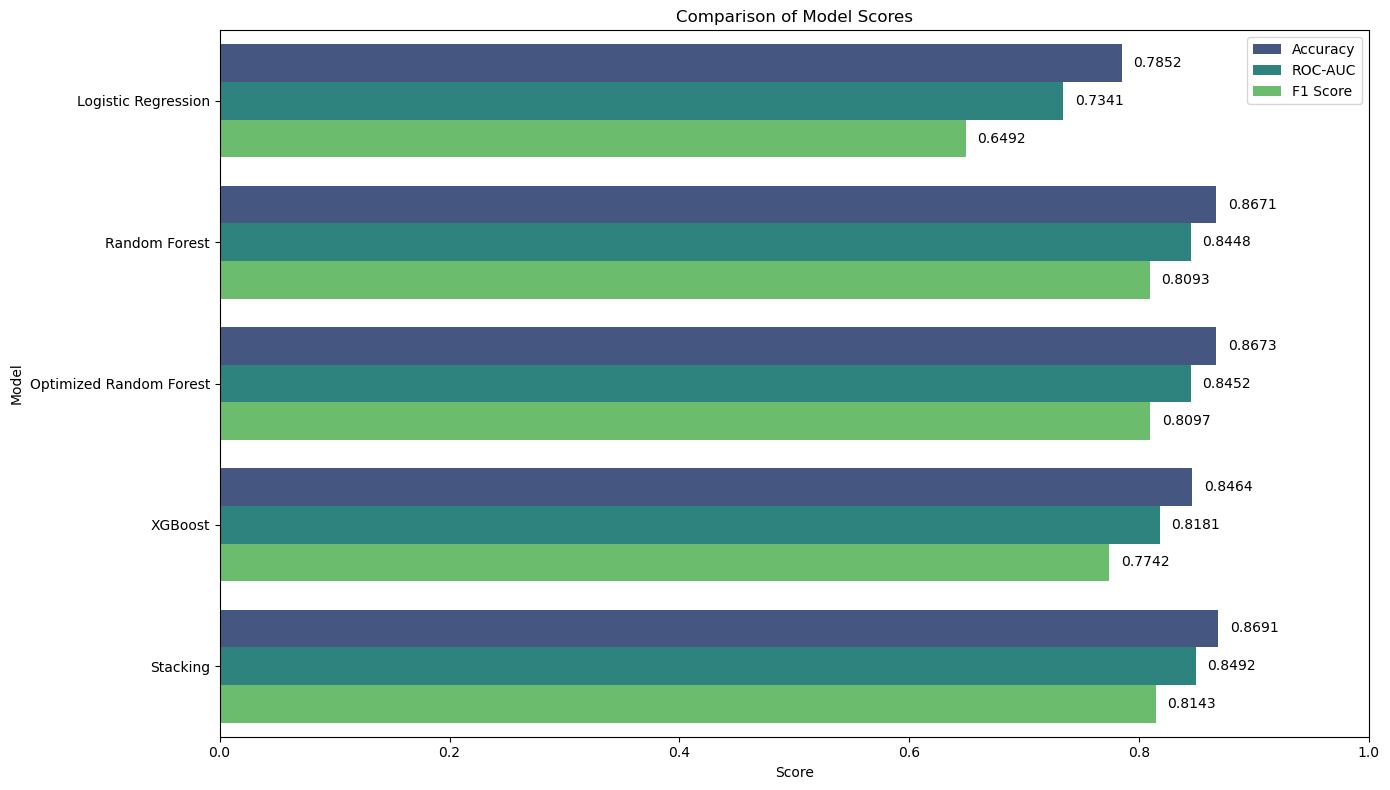

In [ ]:
plt.figure(figsize=(14, 8))

# Melting the DataFrame to work with seaborn
melted_df = scores_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Creating the bar plot
ax = sns.barplot(data=melted_df, x='Score', y='Model', hue='Metric', palette='viridis')

# Adding the text on the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0.1:  # get bar length
        ax.text(width + 0.01,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,  # get Y coordinate + half of the bar's height
                '{:1.4f}'.format(width),  # our format (4 decimal points)
                ha='left',   # horizontal alignment
                va='center')  # vertical alignment

plt.title('Comparison of Model Scores')
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


**The Stacking Model, with its combination of the Optimized Random Forest and XGBoost predictions, is the model with the best evaluation performance and therefore will be our choice. It captures effectively the complex patterns of the data by using the benefits of both models that would be overlooked if we used them individually.**